In [1]:
#importing some basic tools required for Exploration.
import numpy as np#for linear algebra
import pandas as pd#for data wrangling
import matplotlib.pyplot as plt# for great visualization
%matplotlib inline
import seaborn as sns

In [2]:
#we try to load the data set
train_data=pd.read_csv('hacker_train.csv')
test_data=pd.read_csv('hacker_test.csv')

In [3]:
#getting a glimpse of our train data
train_data.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [4]:
#getting a glimpse og our test data
test_data.head()

,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg


In [5]:
#dropping the train id feature(we dont need it), and storing the test id feature(we may need it during submission)
train_data.drop(['id'], axis=1, inplace=True)
test_id=test_data['id']
test_data.drop(['id'], axis=1, inplace=True)

In [6]:
#checking to see our newly stored variable
test_id[:5]

0    1.246628e+18
1    1.245898e+18
2    1.244717e+18
3    1.245730e+18
4    1.244636e+18
Name: id, dtype: float64

In [7]:
#checking to see the shape of both train and test set....
#train(3235 rows and 5 columns.... test(1387 rows and 4 columns.(test data is short one row because we dont have the target variable)))
train_data.shape, test_data.shape

((3235, 5), (1387, 4))

In [8]:
#lets get a deeper view of our entire data
train_data.info()
print('*'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   original_text    3235 non-null   object
 1   lang             3231 non-null   object
 2   retweet_count    3231 non-null   object
 3   original_author  3235 non-null   object
 4   sentiment_class  3235 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 126.5+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   original_text    1387 non-null   object
 1   lang             1387 non-null   object
 2   retweet_count    1386 non-null   object
 3   original_author  1387 non-null   object
dtypes: object(4)
memory usage: 43.5+ KB


In [9]:
#lets get some other decription(we can see very few missing values in the info above)
train_data.describe()
#we see below also that the only non categorical variable we have is the sentiment class. we actually dont need the value

,sentiment_class
count,3235.000000
mean,-0.001236
std,0.688719
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


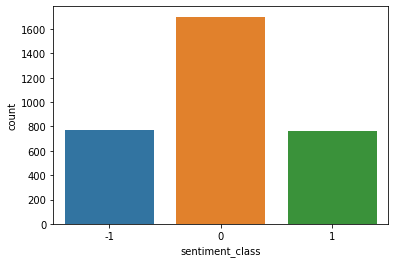

In [10]:
# Let's have a look at out target:
sns.countplot(train_data['sentiment_class'])
#from the plot below, we can see that the neutral class showed up more

In [11]:
#lets get the exact amount each target class
train_data.sentiment_class.value_counts()

 0    1701
-1     769
 1     765
Name: sentiment_class, dtype: int64

In [12]:
#from a close look at the data, i noticed some unusual entries in the language of the tweet
train_data.lang.value_counts()

en                            2994
 pink Peruvian opal! via         4
 Find More                       2
WORLDS OKAYEST MOTHER! &lt       2
&gt                              2
                              ... 
0.7809500796                     1
0.8892995982                     1
-0.8186697209                    1
-0.4189029043                    1
-0.2636714548                    1
Name: lang, Length: 232, dtype: int64

In [13]:
#my best approach is to drop the language column...
#my reason is that going through the data, those rows without en as their option has tweets in en.
#secondly, i see overlapping in the dataset
train_data_lang=train_data['lang']
test_data_lang=test_data['lang']
train_data.drop(['lang'],axis=1, inplace=True)
test_data.drop(['lang'], axis=1, inplace=True)

In [14]:
train_data.shape, test_data.shape

((3235, 4), (1387, 3))

In [15]:
train_data.original_author.value_counts()

LToddWood          369
0                  146
MoM_Mastering       99
andreaanderegg      86
LiveGoodProduct     71
                  ... 
sistecbd             1
-0.3350875182        1
atlantajen           1
impossible8118       1
JKPREALTY1           1
Name: original_author, Length: 1574, dtype: int64